In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('train_bikes.csv')
df.datetime = df.datetime.apply(pd.to_datetime)
df['year'] = df.datetime.apply(lambda x : x.year)
df['month'] = df.datetime.apply(lambda x : x.month)
df['hour'] = df.datetime.apply(lambda x : x.hour)
df['dayofweek'] = df.datetime.apply(lambda x : x.dayofweek)
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,4,5
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,5,5
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,6,5
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,7,5
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011,1,8,5
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011,1,9,5


__Data fields__

__datetime__ - hourly date + timestamp 

__season__ -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

__holiday__ - whether the day is considered a holiday

__workingday__ - whether the day is neither a weekend nor holiday

__weather__ - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

__temp__ - temperature in Celsius

__atemp__ - "feels like" temperature in Celsius

__humidity__ - relative humidity

__windspeed__ - wind speed

__casual__ - number of non-registered user rentals initiated

__registered__ - number of registered user rentals initiated

__count__ - number of total rentals __(target)__

In [3]:
print df.shape
df.describe() #no missing data, different scales

(10886, 16)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,dayofweek
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,11.541613,3.013963
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,6.915838,2.004585
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,6.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,12.000000,3.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,18.000000,5.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,23.000000,6.000000


In [95]:
print df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
year                   int64
month                  int64
hour                   int64
dtype: object


In [4]:
print df.corr()

              season   holiday  workingday   weather      temp     atemp  \
season      1.000000  0.029368   -0.008126  0.008879  0.258689  0.264744   
holiday     0.029368  1.000000   -0.250491 -0.007074  0.000295 -0.005215   
workingday -0.008126 -0.250491    1.000000  0.033772  0.029966  0.024660   
weather     0.008879 -0.007074    0.033772  1.000000 -0.055035 -0.055376   
temp        0.258689  0.000295    0.029966 -0.055035  1.000000  0.984948   
atemp       0.264744 -0.005215    0.024660 -0.055376  0.984948  1.000000   
humidity    0.190610  0.001929   -0.010880  0.406244 -0.064949 -0.043536   
windspeed  -0.147121  0.008409    0.013373  0.007261 -0.017852 -0.057473   
casual      0.096758  0.043799   -0.319111 -0.135918  0.467097  0.462067   
registered  0.164011 -0.020956    0.119460 -0.109340  0.318571  0.314635   
count       0.163439 -0.005393    0.011594 -0.128655  0.394454  0.389784   
year       -0.004797  0.012021   -0.002482 -0.012548  0.061226  0.058540   
month       

In [97]:
df[['season','temp', 'atemp', 'humidity', 'windspeed','count']].corr()

,season,temp,atemp,humidity,windspeed,count
season,1.000000,0.258689,0.264744,0.190610,-0.147121,0.163439
temp,0.258689,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.264744,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,0.190610,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.147121,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.163439,0.394454,0.389784,-0.317371,0.101369,1.000000


In [98]:
df.skew()

season       -0.007076
holiday       5.660517
workingday   -0.776163
weather       1.243484
temp          0.003691
atemp        -0.102560
humidity     -0.086335
windspeed     0.588767
casual        2.495748
registered    1.524805
count         1.242066
year         -0.007717
month        -0.005237
hour         -0.009125
dtype: float64

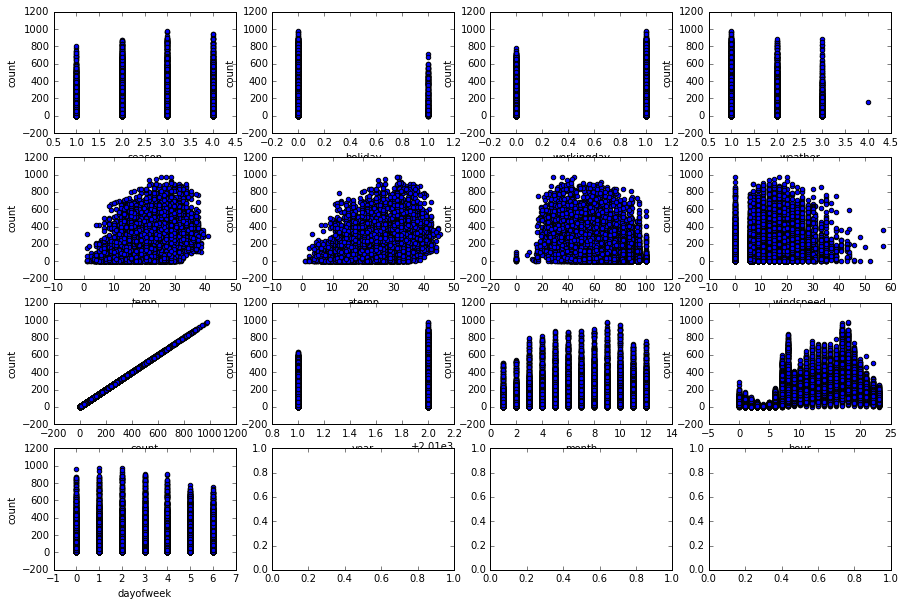

In [6]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 10))
for idx, feature in enumerate(df.columns[1:].drop(['casual','registered'])):
    df.plot(feature, "count", subplots=True, kind="scatter", ax=axes[idx / 4, idx % 4])

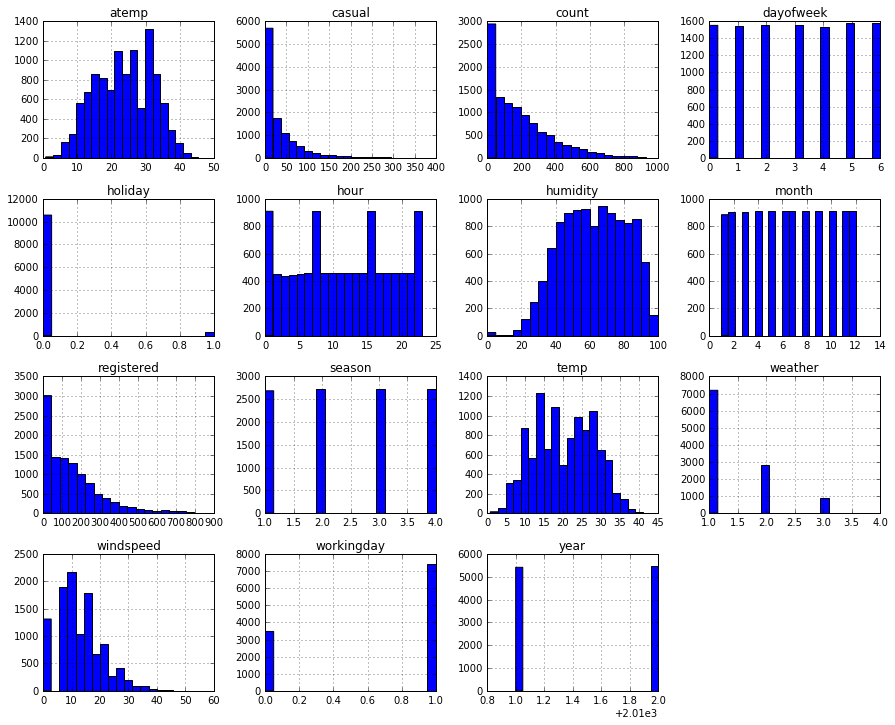

In [7]:
df.hist(figsize=(15, 12),bins=20)
plt.show()

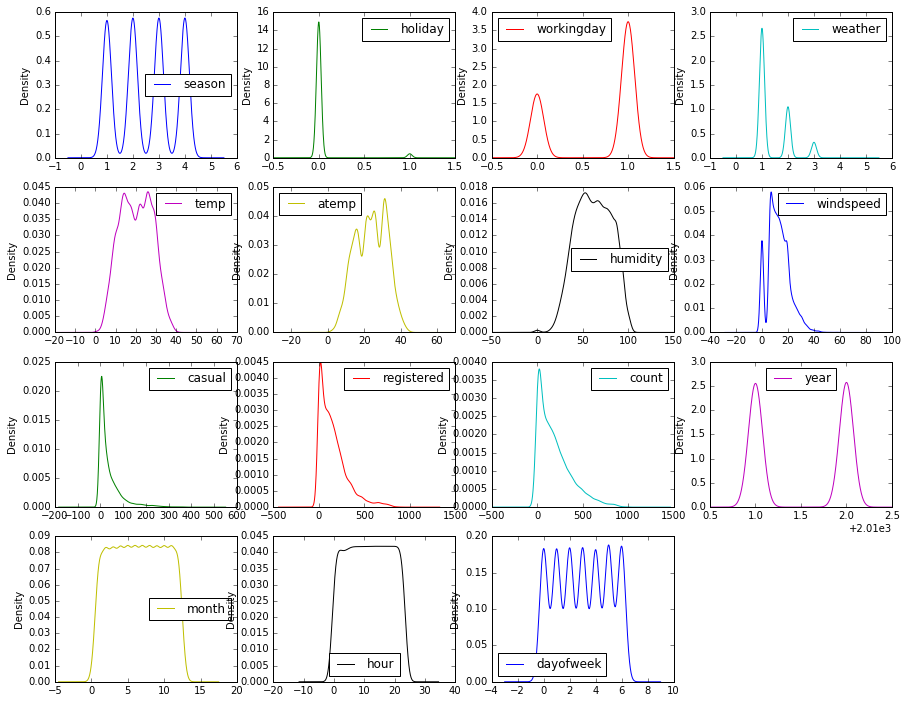

In [8]:
df.plot(kind='density', subplots= True, layout=(4,4), sharex=False, figsize=(15, 12))
plt.show()

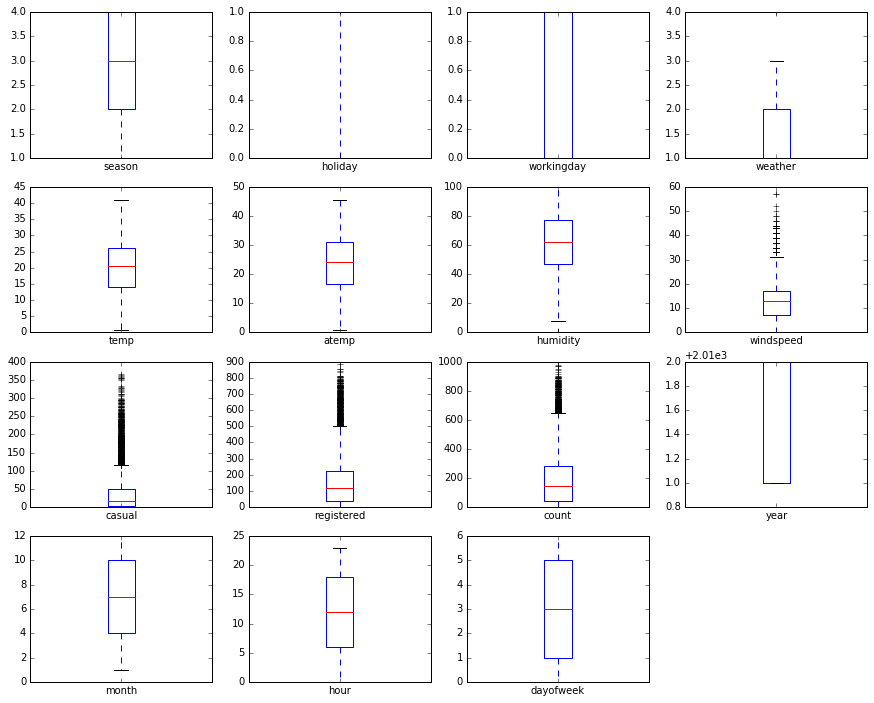

In [9]:
df.plot(kind='box', subplots= True, layout=(4,4), sharex=False, sharey=False, figsize=(15, 12))
plt.show()

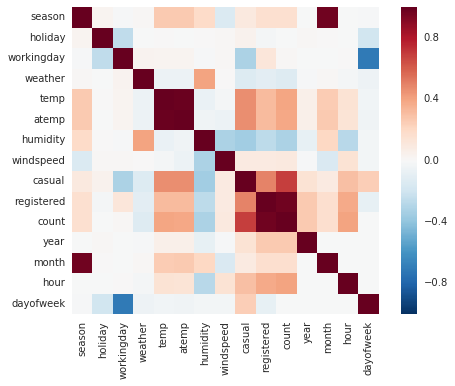

In [11]:
import seaborn
seaborn.heatmap(df.corr(), square=True)
plt.show()

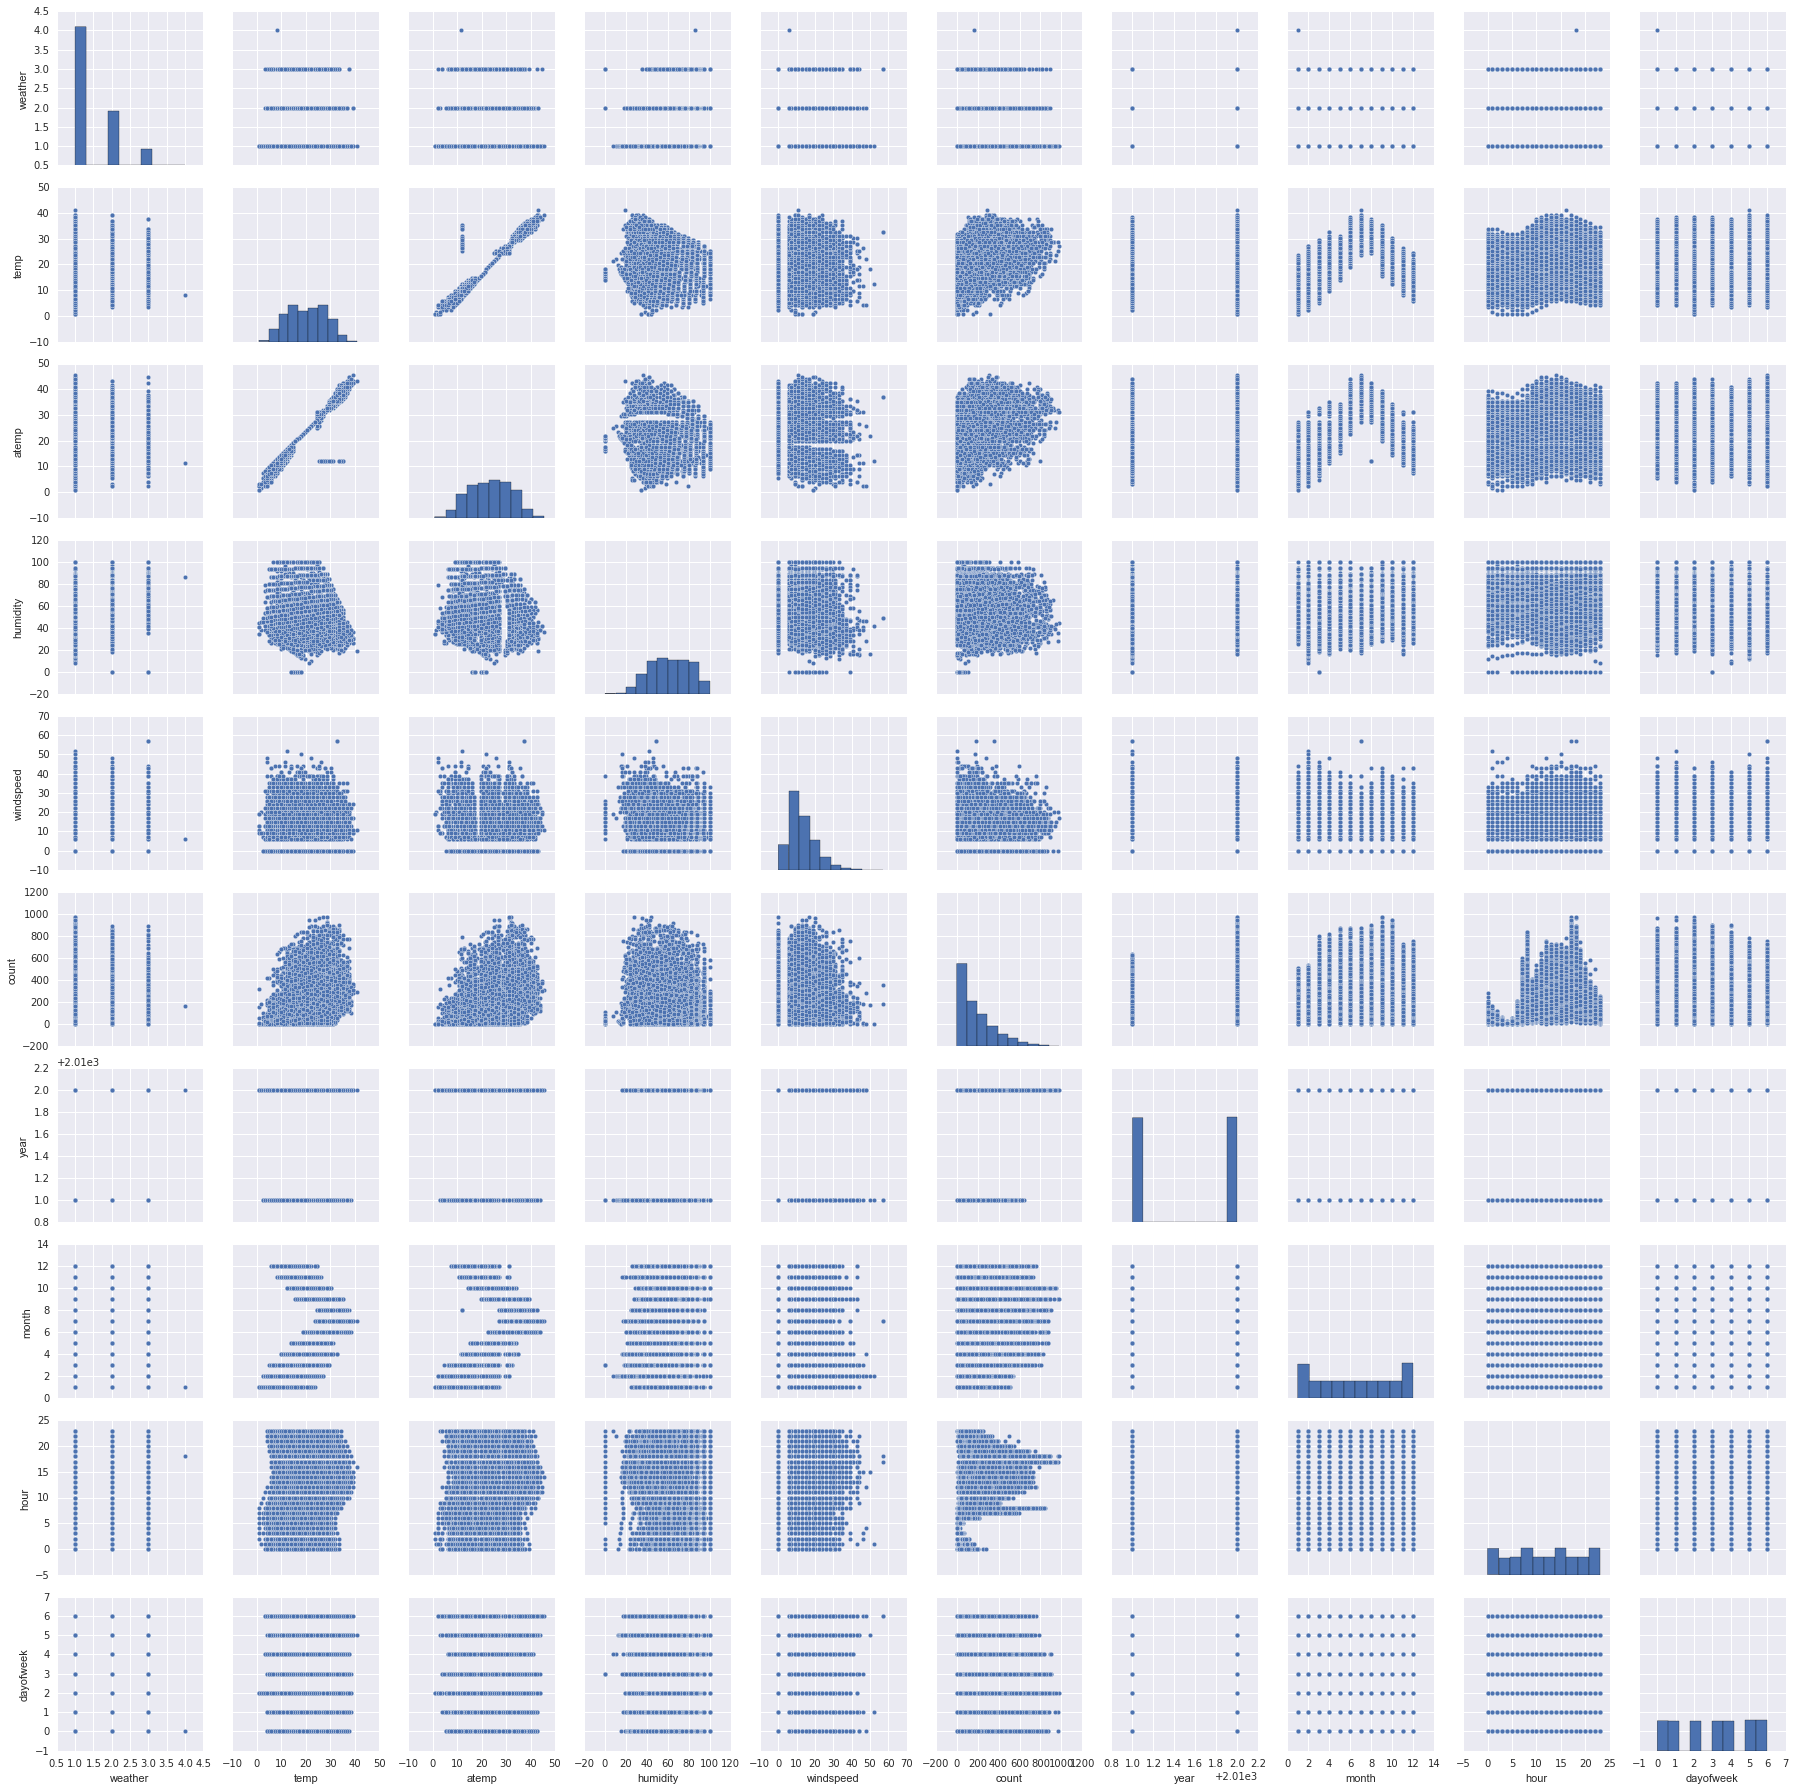

In [12]:
seaborn.pairplot(df[df.columns.drop(['holiday', 'workingday','season',"casual", "registered"])])
plt.show()

In [13]:
from sklearn.preprocessing import scale

In [14]:
X = scale(df[df.columns[1:].drop(['casual','registered','count'])])
y = df["count"]
X.shape

(10886L, 12L)

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
for f,w in zip(df.columns[1:].drop(['casual','registered','count']), lr.coef_):
    print(f,w)

('season', -8.628883922249079)
('holiday', -1.0249957659116546)
('workingday', 0.0910933642575803)
('weather', -3.1189114548009078)
('temp', 13.0198177555996)
('atemp', 39.457456090410609)
('humidity', -39.205660904484333)
('windspeed', 5.0141653524911929)
('year', 41.384416105685936)
('month', 34.213376313651025)
('hour', 53.777925570780837)


In [10]:
from sklearn.linear_model import Lasso, Ridge
lasso = Lasso()
for f,w in zip(df.columns[1:].drop(['casual','registered','count']), lasso.fit(X,y).coef_):
    print(f,w)

('season', 0.0)
('holiday', -0.26924512795914329)
('workingday', 0.0)
('weather', -2.2665738159536719)
('temp', 14.250441584693569)
('atemp', 37.618450853447406)
('humidity', -38.859096820227698)
('windspeed', 3.9599160972007867)
('year', 40.421212187611687)
('month', 24.748572342824929)
('hour', 53.115761017205344)


In [11]:
ridge = Ridge(alpha=100)
for f,w in zip(df.columns[1:].drop(['casual','registered','count']), ridge.fit(X,y).coef_):
    print(f,w)

('season', -3.3750428596401676)
('holiday', -1.1934251178012447)
('workingday', 0.059917797648147315)
('weather', -3.2838468131048968)
('temp', 18.263607825037091)
('atemp', 34.09692245033537)
('humidity', -38.728282482579445)
('windspeed', 4.9166034147444035)
('year', 41.033098179883481)
('month', 28.795684023093738)
('hour', 53.416211789345276)


In [86]:
alphas = np.arange(1, 100, 10)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1]))
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))
for i,a in enumerate(alphas):
    coefs_lasso[i] = Lasso(alpha=a).fit(X,y).coef_
    coefs_ridge[i] = Ridge(alpha=a).fit(X,y).coef_

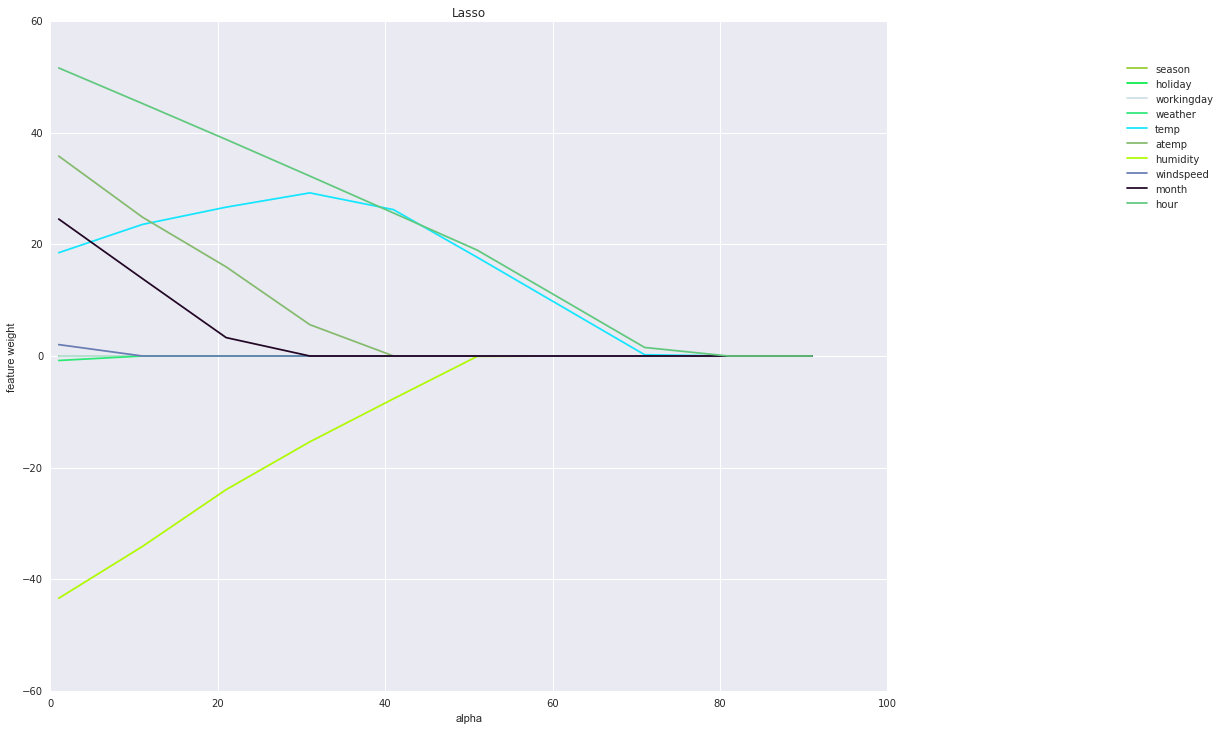

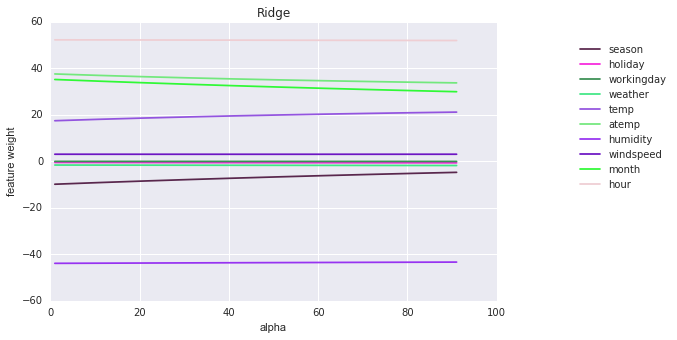

In [87]:
plt.figure(figsize=(15, 12))
for coef, feature in zip(coefs_lasso.T, df.columns[1:].drop(['casual','registered','count'])):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns[1:].drop(['casual','registered','count'])):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions

In [40]:
real_features = ['season','temp', 'atemp', 'humidity', 'windspeed', 'month','hour']
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(df[real_features])
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.     0.224  0.305  0.81   0.     0.     0.   ]
 [ 0.     0.204  0.288  0.8    0.     0.     0.043]
 [ 0.     0.204  0.288  0.8    0.     0.     0.087]
 [ 0.     0.224  0.305  0.75   0.     0.     0.13 ]
 [ 0.     0.224  0.305  0.75   0.     0.     0.174]]


In [88]:
# feature extraction
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(rescaledX, y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(rescaledX)
# summarize selected features
print(features[0:5,:])

[ 338.5    212.033  188.458  122.861   92.685  235.101  787.847]
[[ 0.     0.224  0.305  0.     0.   ]
 [ 0.     0.204  0.288  0.     0.043]
 [ 0.     0.204  0.288  0.     0.087]
 [ 0.     0.224  0.305  0.     0.13 ]
 [ 0.     0.224  0.305  0.     0.174]]


In [13]:
#['season', 'holiday', 'workingday','weather','temp', ('atemp'), 'humidity', 'windspeed']
#season	holiday	workingday	weather	temp	atemp	humidity	windspeed	month	hour
from sklearn.feature_selection import RFE
# feature extraction
model = LinearRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, y)
print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_
X = scale(df[df.columns[1:].drop(['casual','registered','count','atemp','season'])])
model = LinearRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, y)
print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

Num Features: 5
Selected Features: [False False False False False  True  True False  True  True  True]
Feature Ranking: [3 6 7 5 2 1 1 4 1 1 1]
Num Features: 5
Selected Features: [False False False  True  True False  True  True  True]
Feature Ranking: [4 5 3 1 1 2 1 1 1]


In [18]:
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=5)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s") % fit.explained_variance_ratio_
print(fit.components_)

Explained Variance: [ 0.2320261   0.16998187  0.11640419  0.10987506  0.0967102 ]
[[-0.5032829  -0.00652777 -0.01011449 -0.00089271 -0.47559825 -0.48105055
  -0.11282676  0.13827565 -0.0292771  -0.50369929 -0.05036985]
 [ 0.25134994  0.01407627 -0.03003694  0.31028206 -0.3622528  -0.34656427
   0.54036239 -0.30997554 -0.09755158  0.25659886 -0.35309825]
 [ 0.24920668  0.54142645 -0.56000514 -0.33390379 -0.2093396  -0.21450857
  -0.24134301  0.10238017  0.0050787   0.23159448  0.0861916 ]
 [-0.32245071  0.44657803 -0.42533318  0.29829731  0.28337911  0.2916139
   0.28969757 -0.19135202  0.10085286 -0.3302547  -0.1469077 ]
 [ 0.06935026  0.1114604  -0.03796094  0.57572475 -0.01390764 -0.03205944
   0.09029786  0.50342259 -0.40619065  0.06770188  0.46635123]]


In [12]:
from sklearn.ensemble import RandomForestRegressor
# feature extraction
model = RandomForestRegressor()
model.fit(X, y)
print(model.feature_importances_)

[ 0.00920473  0.00291475  0.08032508  0.01550095  0.08056324  0.02148451
  0.03375756  0.01125569  0.0868935   0.05338608  0.6047139 ]


In [54]:
for x in df['count']:
    if x==0:
        print 0

In [17]:
#['season', 'holiday', 'workingday','weather','temp', ('atemp'), 'humidity', 'windspeed']
#season	holiday	workingday	weather	temp	atemp	humidity	windspeed	year month	hour
from sklearn.feature_selection import RFE
# feature extraction
model = RandomForestRegressor()
rfe = RFE(model, 6)
fit = rfe.fit(X, y)
print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

Num Features: 6
Selected Features: [False False  True False  True False  True False  True  True  True]
Feature Ranking: [5 6 1 3 1 2 1 4 1 1 1]
